arr_time        sched_dep_time    0.648593
                dep_time          0.666083
sched_arr_time  sched_dep_time    0.783342
                dep_time          0.787137
                arr_time          0.793778
arr_delay       dep_delay         0.909348
sched_dep_time  dep_time          0.955656
dtype: float64

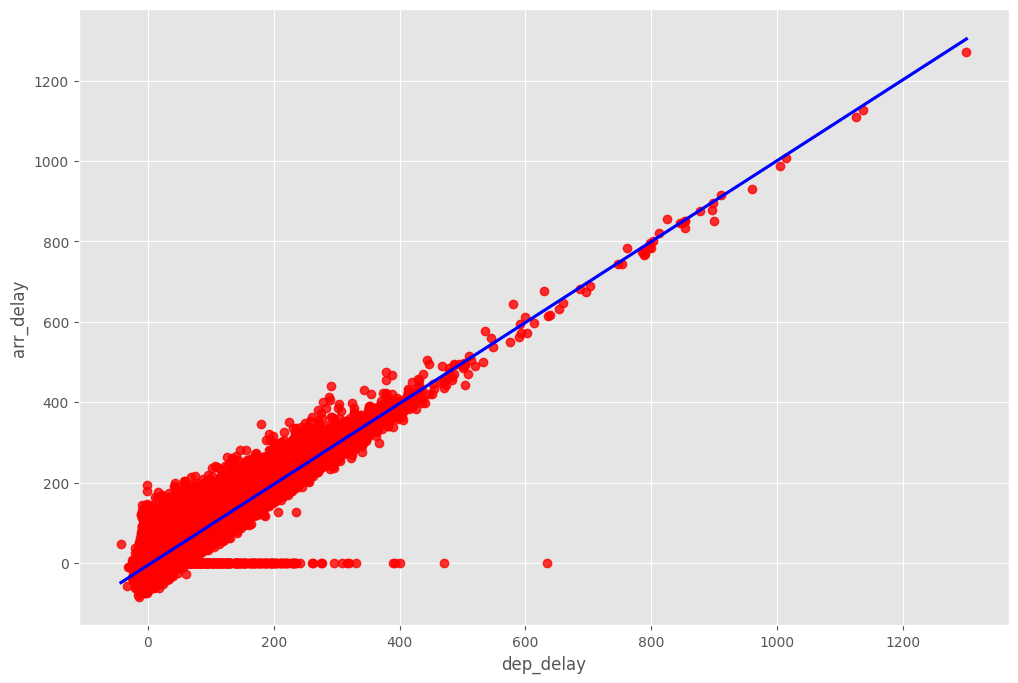

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv("/Users/ryanchristopher/Documents/VisualStudioCode Projects/DataAnalyst Projects/flights.csv")

# Clean up data

df = df.drop_duplicates() # Removes all duplicates and saves the new data set
df = df.drop(columns="tailnum") # Removes unused column and saves the new data set
df = df.drop(columns="air_time")
df = df.drop(columns="hour")
df = df.drop(columns="minute")
df["dep_time"] = df["dep_time"].fillna(df["sched_dep_time"])    # Fill in missing depature time with scheduled depature time
df["arr_time"] = df["arr_time"].fillna(df["sched_arr_time"])
df["arr_delay"] = df["arr_delay"].fillna(0)                     # Difference between two times is 0
df["dep_delay"] = df["dep_delay"].fillna(0)

#df.isnull().sum()
corr_mat = df.corr(numeric_only=True)                                           # Find correlation of df_numerize
dataCorr = corr_mat.mask(np.tril(np.ones(corr_mat.shape)).astype(np.bool))      # Filters out duplicate correlations
corr_pairs = dataCorr.unstack()                                                 # Put those correlations into a single column
sorted_pairs = corr_pairs.sort_values()                                         # Sort those correlations by their value
high_corr = sorted_pairs[(sorted_pairs) > .5]                                   # Remove anything below .5 as that is not a valuable correlation
high_corr[(high_corr) < 1]                                                      # Remove anything with a correlation of 1, as that is just itself
sns.regplot(x="dep_delay", y="arr_delay", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
high_corr
#df.to_csv('flight_delays.csv')      # Export all changes to DataFrame to CSV